## Rotation

In [1]:
# system stuff
import os
import sys
sys.path.append(os.path.join(".."))

# image processing
import cv2
import numpy as np

# display utils
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import matplotlib as mpl

In [109]:
#def jimshow_channel(image, title=False):
#    """
#    Modified jimshow() to plot individual channels
#    """
#    # Acquire default dots per inch value of matplotlib
#    dpi = mpl.rcParams['figure.dpi']
#    height, width = image.shape
#    figsize = width / float(dpi), height / float(dpi)
#    plt.figure(figsize=figsize)
#    plt.imshow(image, cmap='gray')
#    if title:
#        plt.title(title)
#    plt.axis('off')
#    plt.show()'

__Load image__

In [2]:
image = cv2.imread(os.path.join("..", "data", "emojis", "exploding head.png"))

In [3]:
image.shape

(72, 72, 3)

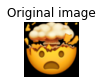

In [4]:
jimshow(image, "Original image")

__Challenge 1: Where is the center?__

In [5]:
center = image.shape[1]//2, image.shape[0]//2 # width, height
center

(36, 36)

__Create rotation matrix__

In [6]:
M = cv2.getRotationMatrix2D(center, 45, 1)

In [7]:
rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0])) # width, height

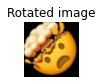

In [12]:
jimshow(rotated, "Rotated image")

__Rotate function__

In [17]:
def imrotate(image, angle, scale, center = None):
    # save height, width
    height, width = image.shape[:2]
    
    # if not center defined, get center
    if center is None:
        center = width//2, height//2
    
    # get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)
    
    # save rotated image
    rotated = cv2.warpAffine(image, M, (width, heigth))
    
    # return rotated image
    return rotated

## Part 2

In [18]:
image = cv2.imread(os.path.join("..", "data", "img", "marilyn.jpg"))

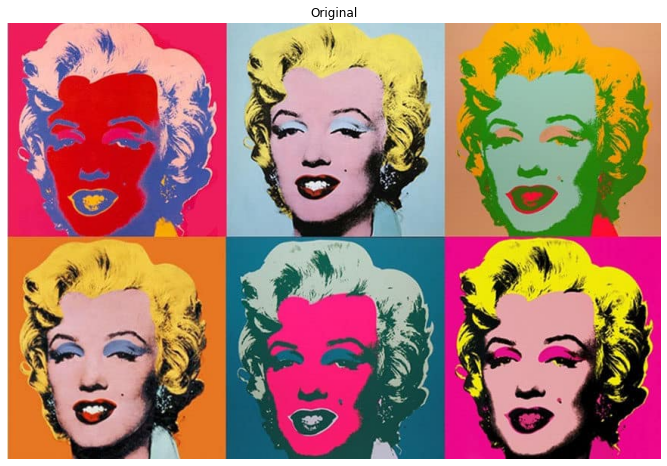

In [19]:
jimshow(image, "Original")

In [20]:
image.shape

(577, 865, 3)

## Splitting channels

In [21]:
(blue, green, red) = cv2.split(image)

In [22]:
print(blue) # blue channel

[[228 113  93 ... 113 113 110]
 [228 113  93 ... 113 113 110]
 [228 113  93 ... 113 113 111]
 ...
 [181  89  52 ... 139 139 137]
 [181  89  52 ... 139 139 137]
 [179  88  52 ... 139 139 137]]


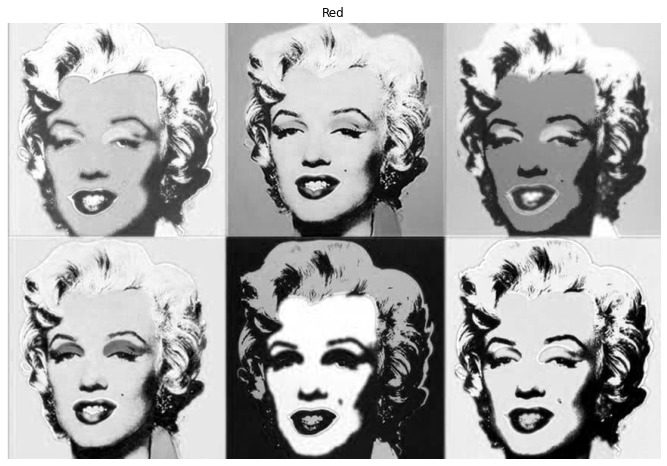

In [23]:
jimshow_channel(red, "Red")

__Define empty numpy array__

In [24]:
empty_array = np.zeros(image.shape[:2], dtype = "uint8")

In [25]:
empty_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
red_image = cv2.merge([empty_array, empty_array, red])

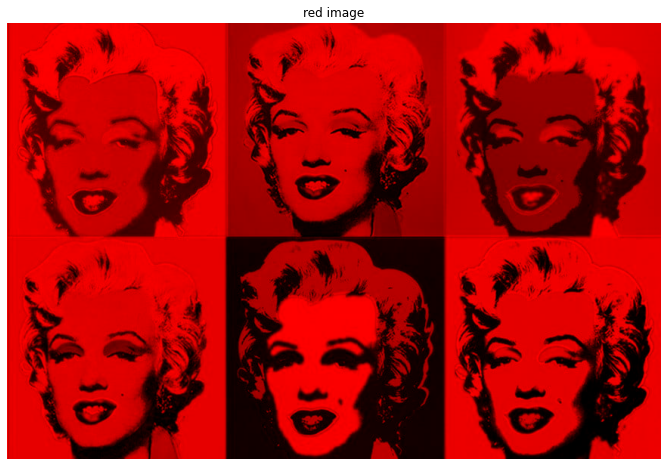

In [27]:
jimshow(red_image, "red image")

In [28]:
blue_image = cv2.merge([blue, empty_array, empty_array])

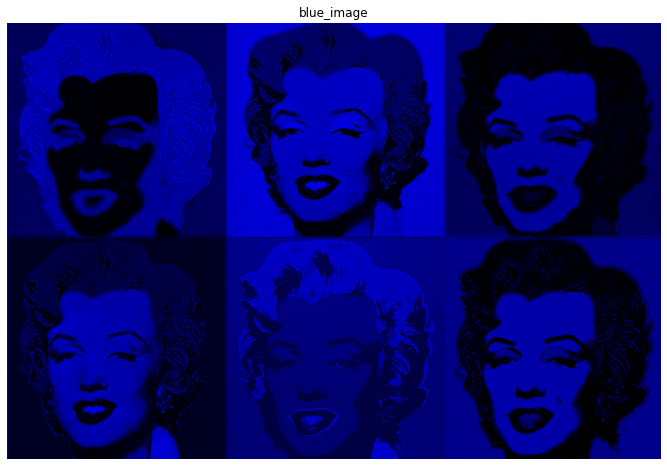

In [29]:
jimshow(blue_image, "blue_image")

In [30]:
green_image = cv2.merge([empty_array, green, empty_array])

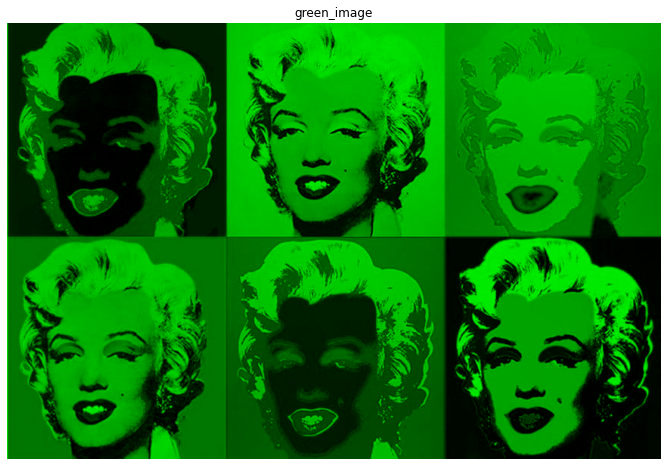

In [31]:
jimshow(green_image, "green_image")

## Histograms

In [32]:
# image.flatten: flatten image into 1D array (from 2D)
grey_image = image.flatten()

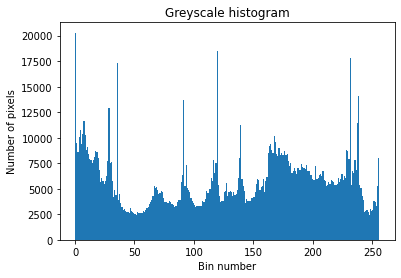

In [33]:
# create figure 
plt.figure()
plt.hist(grey_image, 256, [0,256]) # array, bins, range
plt.title("Greyscale histogram")
plt.xlabel("Bin number")
plt.ylabel("Number of pixels")
plt.show()

## Studying multiple images

In [34]:
def plot_greyscale(input_image, image_name):
    plt.figure()
    plt.hist(input_image.flatten(), 256, [0,256]) # array, bins, range
    plt.title(f"Greyscale histogram of {image_name}")
    plt.xlabel("Bin number")
    plt.ylabel("Number of pixels")
    plt.show()

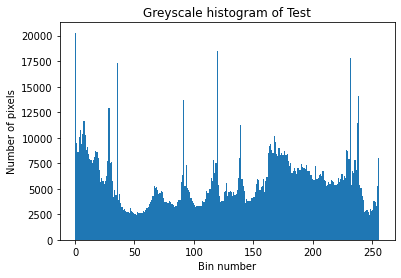

In [35]:
plot_greyscale(image, "Test")

In [36]:
from pathlib import Path

# define path
image_path = os.path.join("..", "data", "img")

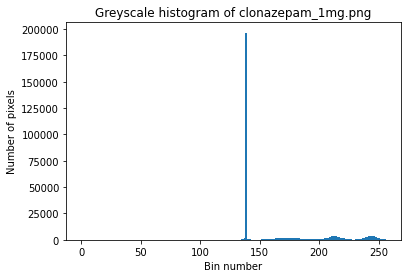

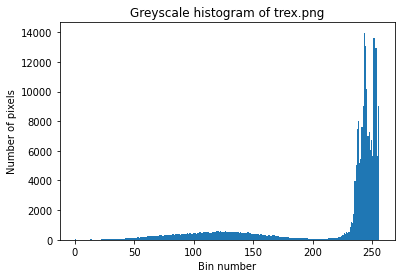

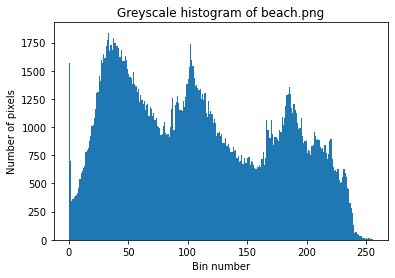

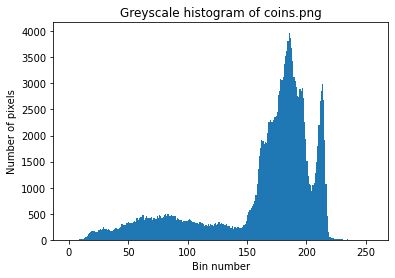

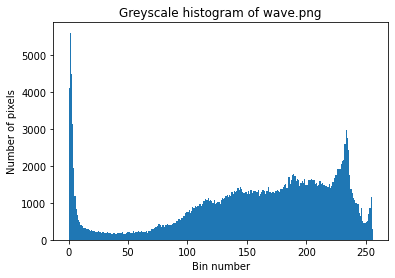

In [37]:
# for each png image in image_path
for image in Path(image_path).glob("*.png"):
    # get image path
    image_path = str(image)
    # read image
    image = cv2.imread(image_path)
    # get image name
    image_name = os.path.split(image_path)[1]
    # use greyscale function to plot greyscale histogram
    plot_greyscale(image, image_name)